In [1]:
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import numpy as np

In [129]:
df = pd.read_csv('churn.csv')
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


1. Построить гистограмму количества звонков в техническую поддержку

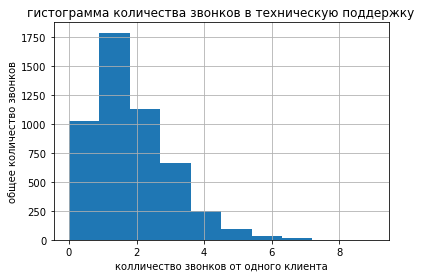

In [110]:
df['number_customer_service_calls'].hist()
plt.xlabel('колличество звонков от одного клиента')
plt.ylabel('общее количество звонков')
plt.title('гистограмма количества звонков в техническую поддержку')
plt.grid(True)
plt.show()   

из гистаграммы можно сделать вывод о том, что большинство клиентов ограничивается одним звонком в тех. поддержку. 

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

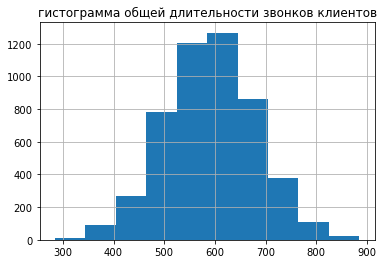

In [131]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
plt.hist(df['total_minutes'])
plt.title('гистограмма общей длительности звонков клиентов')
plt.grid(True)
plt.show()

гистограмма показывает, что в среднем клиенты тратят около 600 минут за сутки. 

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [132]:
import math
assert len(df['number_customer_service_calls']) == len(df['total_minutes'])
n = len(df['number_customer_service_calls'])
assert n > 0
avg_x = float(sum(df['number_customer_service_calls'])) / len(df['number_customer_service_calls'])
avg_y = float(sum(df['total_minutes'])) / len(df['total_minutes'])
diffprod = 0
xdiff2 = 0
ydiff2 = 0
for idx in range(n):
    xdiff = df['number_customer_service_calls'][idx] - avg_x
    ydiff = df['total_minutes'][idx] - avg_y
    diffprod += xdiff * ydiff
    xdiff2 += xdiff * xdiff
    ydiff2 += ydiff * ydiff
    cor = diffprod / math.sqrt(xdiff2 * ydiff2)
print('Коэффициент корреляции Пирсона:',cor)

from scipy.stats import pearsonr
corr, p_value = pearsonr(df['number_customer_service_calls'], df['total_minutes'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.01140791082744116
Коэффициент корреляции Пирсона: -0.011407910827441387


Коэффициент корреляции Пирсона говорит о том, что между переменными обратная зависимость 

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

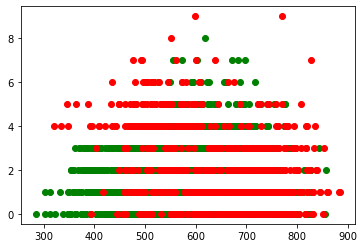

In [116]:
plt.scatter(df[df['churned'] == False]['total_minutes'], df[df['churned'] == False]['number_customer_service_calls'], color='g')
plt.scatter(df[df['churned'] == True]['total_minutes'], df[df['churned'] == True]['number_customer_service_calls'], color='r')
plt.show()

большинство клиентов покидает компанию, если пользуется её услугами больше 400 минут, если при этом им не приходится звонить в тех.поддержку чаще трех раз. 

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [117]:
sorted_data = df.sort_values(by = 'total_minutes', ascending = False)
print('top-5 самых много говорящих клиентов:')
sorted_data.phone_number.head()

top-5 самых много говорящих клиентов:


985     345-9140
289     352-6976
3205    345-3787
4991    410-3888
4271    370-4667
Name: phone_number, dtype: object

In [118]:
print('top-5 самых мало говорящих клиентов:')
sorted_data.phone_number.tail()

top-5 самых мало говорящих клиентов:


992     375-8934
1986    405-9233
3779    362-8044
1233    380-5246
648     331-3174
Name: phone_number, dtype: object

6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [133]:
df['mean_charge_minutes'] = df['total_day_charge']/df['total_day_minutes']

In [120]:
for state in df.state:
    print(state,': Доля оттока клиентов:', df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[0]*100,'% \n')
    print('Средняя стоимость минуты дневного времени разговора:', sum(df[(df.state == state)].mean_charge_minutes)/df[df.state == state].count().values[0], '\n')

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

LA : Доля оттока клие

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

MN : Доля оттока клиентов: 16.0 % 

Средняя ст

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средня

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

IN : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.16999955151681176 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

AZ : Д

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

MN : Доля оттока клиентов: 16.0 % 

Средня

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

IN : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.16999955151681176 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

AK : Доля оттока клие

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

AZ :

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

UT 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

UT : Доля оттока клиентов:

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

DC : Доля оттока клиентов: 10.227272727272728 % 

Сред

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

KS : Доля оттока 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средня

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

FL : Доля оттока клиентов: 13.333

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

VT : Доля оттока клиентов: 9.900

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость м

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

IN : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.16999955151681176 

CT : Доля оттока 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

WI : Доля оттока клиенто

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

KS : Доля оттока клиентов: 18.181818

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

IA : До

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

WA

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного време

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

MN 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

SD : Дол

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

WI : Доля отток

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

ID :

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

AL : 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

FL : Д


MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

NJ : Доля оттока клие

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость ми

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

LA : Доля оттока клие

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

CA : Доля оттока клиентов: 26.923076923076923 % 

Средняя стоимость минуты дневного времени разговора: 0.17000349532173592 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средня

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

RI : До

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

NC : Д

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Сре

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость ми

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневног

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

AL : Доля оттока клиен

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

VA : Доля оттока кли

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

NJ : Доля оттока клиент

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

MN : До

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

CA : Доля оттока клиентов: 26.923076923076923 % 

Средняя стоимость минуты дневного времени разговора: 0.17000349532173592 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

NH :

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

IN : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.16999955151681176 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

UT :

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

NJ : Доля оттока кли

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

WA : Д

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

MO : Доля оттока клиентов: 12.9032258

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

DE : Доля оттока клиентов: 15.957446808510639 % 

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

NH : Доля оттока клиентов: 12.63157894

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

CT : Доля оттока клиентов: 16.161616161616163 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

IA : До

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

CO : До

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

IN : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.16999955151681176 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

IA : Д

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

WY : Доля оттока к

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

IL : Доля 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

MN : Доля оттока кли

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

NY : Доля оттока клиентов: 17.543859649122805 % 

Средняя стоимость минуты дневного времени разговора: 0.17000366590869367 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

WI :

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

IL : Доля оттока клиентов: 7.954545454545454 % 

Средняя стоимость минуты дневного времени разговора: 0.1700037716584672 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость мину

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

AK : Доля оттока клиентов: 6.944444444444445 % 

Средняя стоимость минуты дневного времени разговора: 0.1700015214047099 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

WV : Доля оттока кли

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

HI : Доля оттока клиентов: 5.813953488372093 % 

Средняя стоимость минуты дневного времени разговора: 0.16999966083809578 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

ND : Доля оттока клие

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

TX : Доля оттока клиентов: 22.413793103448278 % 

Сред

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

AZ : Доля оттока клиентов: 10.112359550561797 % 

Средняя стоимость минуты дневного времени разговора: 0.17000187550447118 

NV : Доля оттока клиентов: 18.88888888888889 % 

Средняя стоимость минуты дневного времени разговора: 0.17000296414860694 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты д

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

MT : Доля оттока клиентов: 21.21212121212121 % 

Средняя стоимость минуты дневного времени разговора: 0.1700005779827964 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

TN : Доля от

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

RI : Доля оттока клиентов: 7.07070707070707 % 

Средняя стоимость минуты дневного времени разговора: 0.1700044882289804 

DC : Доля оттока клиентов: 10.227272727272728 % 

Средняя стоимость минуты дневного времени разговора: 0.17000856850114776 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

OR : Доля оттока клиентов: 15.789473684210526 % 

Средняя стоимость минуты дневного времени разговора: 0.17000899578287715 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средн

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

WI : Доля оттока клиентов: 7.547169811320755 % 

Средняя стоимость минуты дневного времени разговора: 0.16999870695631594 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

KS : Доля оттока клиентов: 18.181818181818183 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027862649722 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минуты дневного времени разговора: nan 

UT : Доля оттока клиенто

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

MI : Доля оттока клиентов: 17.475728155339805 % 

Средняя стоимость минуты дневного времени разговора: 0.1700027573580645 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

PA : Доля оттока клиентов: 10.3896

Средняя стоимость минуты дневного времени разговора: 0.17000515533395988 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость минуты дневного времени разговора: 0.17000323210145418 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

NH : Доля оттока клиентов: 12.631578947368421 % 

Средняя стоимость минуты дневного времени разговора: 0.17000429440804155 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимост

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

VA : Доля оттока клиентов: 5.084745762711865 % 

Средняя стоимость минуты дневного времени разговора: 0.17000288054980883 

AL : Доля оттока клиентов: 10.483870967741936 % 

Средняя стоимость минуты дневного времени разговора: 0.1700013329716803 

MN : Доля оттока клиентов: 16.0 % 

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

CA : Доля оттока клиентов: 26.923076923076923 % 

Средняя стоимость минуты дневного времени разговора: 0.17000349532173592 

KY : Доля оттока клиентов: 15.151515151515152 % 

Средняя стоимость минуты дневного времени разговора: 0.17000800973759486 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

VT : Доля оттока кли

Средняя стоимость минуты дневного времени разговора: 0.17000450198197306 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

LA : Доля оттока клиентов: 8.536585365853659 % 

Средняя стоимость минуты дневного времени разговора: 0.17000424778238132 

IA : Доля оттока клиентов: 11.594202898550725 % 

Средняя стоимость минуты дневного времени разговора: 0.17000844477675295 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

VT : Доля оттока клиентов: 9.900990099009901 % 

Средняя стоимость минуты дневного времени разговора: nan 

MA : Доля оттока клиентов: 16.50485436893204 % 

Средняя стоимость минуты дневного времени разговора: 0.1699996584851606 

SD : Доля оттока клиентов: 14.117647058823529 % 

Средняя стоимость минут

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

CO : Доля оттока клиентов: 11.458333333333332 % 

Средняя стоимость минуты дневного времени разговора: 0.17000249581284835 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

TN : Доля оттока клиентов: 15.730337078651685 % 

Средняя стоимость минуты дневного времени разговора: 0.17000452041435707 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость минуты дневного времени разговора: 0.17000328448548618 

ID : Доля оттока клиентов: 11.76470588235294 % 

Средняя стоимость 

Средняя стоимость минуты дневного времени разговора: 0.1700016593171857 

SC : Доля оттока клиентов: 17.582417582417584 % 

Средняя стоимость минуты дневного времени разговора: 0.17000791222234876 

WA : Доля оттока клиентов: 24.489795918367346 % 

Средняя стоимость минуты дневного времени разговора: 0.1700016728460799 

AR : Доля оттока клиентов: 17.391304347826086 % 

Средняя стоимость минуты дневного времени разговора: 0.1700026921458431 

TX : Доля оттока клиентов: 22.413793103448278 % 

Средняя стоимость минуты дневного времени разговора: 0.1700028801253297 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

NJ : Доля оттока клиентов: 25.0 % 

Средняя стоимость минуты дневного времени разговора: 0.1700009208899428 

ME : Доля оттока клиентов: 18.446601941747574 % 

Средняя стоимость минуты дневного времени разговора: 0.17000676458119385 

PA : Доля оттока клиентов: 10.38961038961039 % 

Средняя стоимость ми

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

UT : Доля оттока клиентов: 14.285714285714285 % 

Средняя стоимость минуты дневного времени разговора: 0.17000215732320995 

MS : Доля оттока клиентов: 17.17171717171717 % 

Средняя стоимость минуты дневного времени разговора: 0.17000383170398084 

OH : Доля оттока клиентов: 12.931034482758621 % 

Средняя стоимость минуты дневного времени разговора: 0.17000806527755705 

NM : Доля оттока клиентов: 10.989010989010989 % 

Средняя стоимость минуты дневного времени разговора: 0.17000156991918655 

ND : Доля оттока клиентов: 11.363636363636363 % 

Средняя стоимость минуты дневного времени разговора: 0.17000709766466438 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

NE : Доля оттока клиентов: 6.8181818181818175 % 

Средняя стоимость минуты дневного времени разговора: 0.1700029043457196 

MO : Доля оттока клиентов: 12.903225806451612 % 

Сре

WY : Доля оттока клиентов: 9.565217391304348 % 

Средняя стоимость минуты дневного времени разговора: 0.170003269363282 

MD : Доля оттока клиентов: 20.588235294117645 % 

Средняя стоимость минуты дневного времени разговора: 0.17000346309144565 

MO : Доля оттока клиентов: 12.903225806451612 % 

Средняя стоимость минуты дневного времени разговора: 0.17000753921161996 

NC : Доля оттока клиентов: 13.186813186813188 % 

Средняя стоимость минуты дневного времени разговора: 0.16999636106598828 

WV : Доля оттока клиентов: 13.924050632911392 % 

Средняя стоимость минуты дневного времени разговора: 0.1700049491351395 

GA : Доля оттока клиентов: 12.048192771084338 % 

Средняя стоимость минуты дневного времени разговора: 0.17000285296030704 

OK : Доля оттока клиентов: 17.77777777777778 % 

Средняя стоимость минуты дневного времени разговора: 0.1699922857640802 

FL : Доля оттока клиентов: 13.333333333333334 % 

Средняя стоимость минуты дневного времени разговора: 0.17000128818261162 

MD : Д

Получается, что в среднем доля оттока не выше 20-ти процентов, а средняя цена за минуту дневного времени составляет 17 центов.

7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [127]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)


In [136]:
data_selected = df.drop(columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','total_minutes', 'mean_charge_minutes'])
data_selected = pd.get_dummies(data_selected, ['state'])
data_selected.head(20)  

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
6,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,0,0,0
7,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,...,0,0,0,0,0,0,0,0,0,0
8,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,...,0,0,0,0,0,0,0,0,0,0
9,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,...,0,0,0,0,0,0,0,0,1,0


9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [138]:
data_selected.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [142]:
x, y = data_selected[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'number_customer_service_calls', 'total_intl_minutes',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], data_selected['churned']

In [143]:
# Разделяем данные на данные для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,number_customer_service_calls,total_intl_minutes,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
4870,24,230.5,184.7,159.1,1,10.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4447,126,261.6,192.9,246.9,4,7.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3327,79,134.7,189.7,221.4,2,11.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4040,79,161.6,187.5,220.8,2,10.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,117,259.3,245.6,269.3,3,9.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
y_train.head()

4870    False
4447    False
3327    False
4040    False
3358    False
Name: churned, dtype: bool

In [145]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
X_train

array([[-1.92537348,  0.93087116, -0.30720867, ..., -0.14466874,
        -0.18181818, -0.15085201],
       [ 0.65633648,  1.50807561, -0.1455147 , ..., -0.14466874,
        -0.18181818, -0.15085201],
       [-0.53327497, -0.84714125, -0.20861479, ..., -0.14466874,
        -0.18181818, -0.15085201],
       ...,
       [-0.17892262, -0.63184956,  0.32182028, ..., -0.14466874,
        -0.18181818, -0.15085201],
       [-0.81169467, -0.42769365,  0.40661101, ..., -0.14466874,
        -0.18181818, -0.15085201],
       [-1.06480349,  0.55225474,  0.95873673, ..., -0.14466874,
        -0.18181818,  6.62901352]])

In [147]:
X_train = pd.DataFrame(X_train, columns=x.columns)
X_test = pd.DataFrame(X_test, columns=x.columns)

In [148]:
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,number_customer_service_calls,total_intl_minutes,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-1.925373,0.930871,-0.307209,-0.820059,-0.420077,0.124525,-0.119159,-0.159305,-0.141024,-0.13346,...,-0.135388,-0.132487,-0.156813,-0.155974,-0.155131,-0.147348,-0.143766,-0.144669,-0.181818,-0.150852
1,0.656336,1.508076,-0.145515,0.935221,1.888036,-1.071611,-0.119159,-0.159305,-0.141024,-0.13346,...,-0.135388,-0.132487,-0.156813,-0.155974,-0.155131,-0.147348,-0.143766,-0.144669,-0.181818,-0.150852
2,-0.533275,-0.847141,-0.208615,0.425430,0.349294,0.559483,-0.119159,-0.159305,-0.141024,-0.13346,...,-0.135388,-0.132487,-0.156813,-0.155974,-0.155131,-0.147348,-0.143766,-0.144669,-0.181818,-0.150852
3,-0.533275,-0.347887,-0.251996,0.413435,0.349294,0.015785,-0.119159,-0.159305,-0.141024,-0.13346,...,-0.135388,-0.132487,-0.156813,-0.155974,-0.155131,-0.147348,-0.143766,-0.144669,-0.181818,-0.150852
4,0.428539,1.465388,0.893665,1.383037,1.118665,-0.382927,-0.119159,-0.159305,-0.141024,-0.13346,...,-0.135388,-0.132487,-0.156813,-0.155974,-0.155131,-0.147348,-0.143766,-0.144669,-0.181818,-0.150852


10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [150]:
logistic = LogisticRegression()

In [151]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [152]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [153]:
svc_model=SVC()

In [154]:
svc_model.fit(X_train, y_train)

SVC()

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, logistic.predict(X_test))

0.84

In [159]:
accuracy_score(y_test, tree.predict(X_test))

0.843

In [160]:
precision_score(y_test, logistic.predict(X_test))

0.6

In [161]:
recall_score(y_test, logistic.predict(X_test))

0.09090909090909091

In [162]:
f1_score(y_test, logistic.predict(X_test))

0.15789473684210525

In [163]:
accuracy_score(y_test, tree.predict(X_test))

0.843

In [164]:
precision_score(y_test, tree.predict(X_test))

0.5235294117647059

In [165]:
recall_score(y_test, tree.predict(X_test))

0.5393939393939394

In [166]:
f1_score(y_test, tree.predict(X_test))

0.5313432835820896

In [167]:
accuracy_score(y_test, svc_model.predict(X_test))

0.836

In [168]:
precision_score(y_test, svc_model.predict(X_test))

1.0

In [169]:
recall_score(y_test, svc_model.predict(X_test))

0.006060606060606061

In [170]:
f1_score(y_test, svc_model.predict(X_test))

0.012048192771084336